In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001411974"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001411974
SIC,6036
Description,"SAVINGS INSTITUTIONS, NOT FEDERALLY CHARTERED"
Name,MERIDIAN INTERSTATE BANCORP INC
Ticker,EBSB


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,12.0,1.056583e+01,7.908391e-01,9.08,1.008750e+01,10.67,1.109750e+01,11.78
interest income,26.0,1.931788e+07,4.255878e+06,12909000.00,1.453825e+07,20172000.00,2.194425e+07,26301000.00
net income,26.0,2.504962e+06,2.057501e+06,-2216000.00,1.978250e+06,2787000.00,3.821750e+06,5504000.00
net interest income,26.0,1.398650e+07,4.713830e+06,5838000.00,9.795250e+06,14907000.00,1.711400e+07,21239000.00
provision for loan losses,26.0,1.247846e+06,9.503182e+05,77000.00,5.010000e+05,1098000.00,2.087500e+06,3219000.00


# Plots

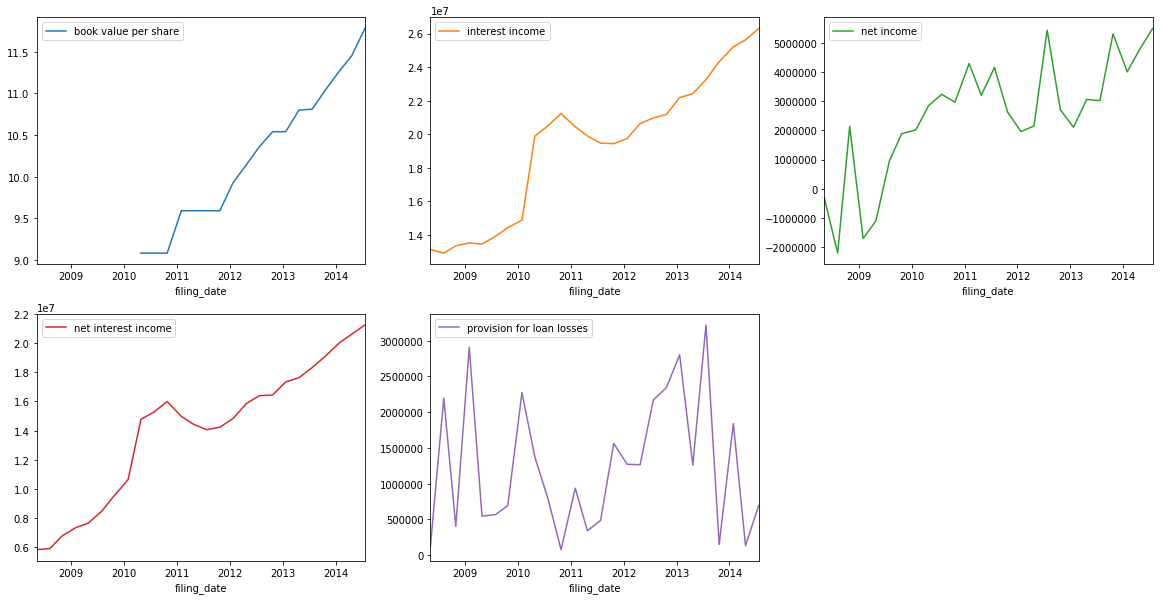

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                         
0001411974 book value per share  2008Q1 to 2009Q4: 8 periods  missing   
           book value per share  2010Q2 to 2010Q3: 2 periods  missing   
           book value per share  2011Q1 to 2011Q3: 3 periods  missing   
           book value per share                       2012Q4  missing   
           total revenue                                None    empty   

                                            message  
cik        item                                      
0001411974 book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           total revenue         No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()